In [106]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = np.loadtxt("data.txt", delimiter = ",")

In [98]:
X = data[:, 0]
Y = data[:, 1].reshape(X.size, 1)
X = np.vstack((np.ones((X.size, )), X)).T

In [99]:
print(X.shape)
print(Y.shape)

(45, 2)
(45, 1)


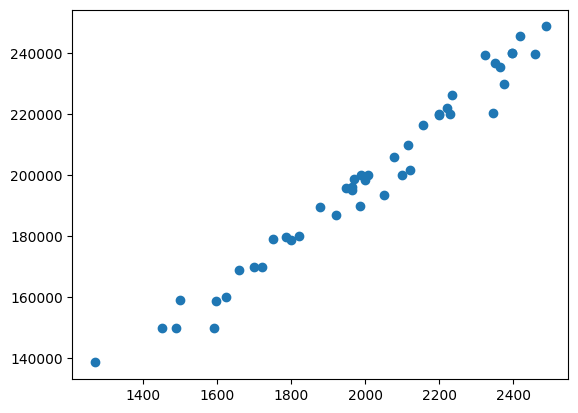

In [107]:
plt.scatter(X[:, 1], Y)
plt.show()

In [108]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((2, 1)) 
    # THETA INNITED FOR BOTH PARAMETERS, [X, Y]
    # THESE TWO VALUES WILL GIVE YOU ANY VALUE OF Y GIVE A VALUE OF X ON A LINE: y = aX + b
    # THE GOAL OF LINEAR REGRESSION IS TWO FIND THE TWO VALUES THAT CREATE THE LINE OF BEST FIT
    # print("starting theta:", theta)
    cost_list = []
    
    for i in range(iteration):

        y_pred = np.dot(X, theta)
        # FOR EACH VAlUE OF X WE PREDICT WHAT Y WOULD BE GIVEN OUR CURRENT LINE OF BEST FIT
        # CURRENT LINE OF BEST FIT IS DENOTED BY THE TWO THETA VALUES: y = Θ1X + Θ2
        # THE EXTRA 1 COLUMN OF X WAS CREATE TO KEEP Θ2 AT ITS OWN VALUE
        # [1 * Th1] + [xValue * Th2] >> [1 * 0] + [1.456 * 0]
        # print("y_pred:\n", y_pred)

        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        # COMPUTE THE DIFFERENCES, SQUARE THEM ALL, SUM THEM, DIVIDE BY DATAPOINTS
        # THIS IS THE METRIC TO MEASURE HOW GOOD/BAD THE OVERALL PREDICTION IS
        print("cost:", cost)

        ### NOTE ###
        # NOW THERE NEED TO BE AN ALGO OR MECHANISM INPLACE TO OPTIMIZE THE EQUATION 
        # THE EQUATION NEEDS TO BE CHANGED TO MINIMISE THE COST METRIC

        # GRADIENT DESCENT ALGORITHM FOR OPTIMIZATION
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        # THE GOAL HERE SEEMS TO BE TO CREATE A CUMLATIVE SUMATION OF THE TWO THETHAS
        # [1 * yError1 + 1 * yError2 + 1 * yError3 + ... + 1 * yErrorN]
        # [X1 * yError1 + X2 * yError2 + X3 * yError3 + ... + 1 * yErrorN]
        # THIS CREATES TWO LARGE NUMBERS WHICH WILL BE +VE OR -VE DEPENDING ON THE SLOPE
        # print("d_theta:", d_theta)

        
        theta = theta - learning_rate*d_theta
        # D_THETA DETERMINS THE DIRECTION OF THE ADJUSTMENT 
        # LEARNING RATE DETERMINES HOW MUCH THIS CORRECT IS APPLIED 
        # IN THE FIRST INITIAL ITERATION ALL THE yERRORS WERE HUGE NEGATIVE NUMBERS
        # BECAUSE THE LINE OF BEST FIT WAS SET TO 0,0
        # THE RESULT WAS D_THETA: [[-158,318.856] [-323,611,843]]
        # WHEN LR APPLIED: [[-0.00791594280] [-16.1805922]]
        # THE THIS IS SUBTRACTED FROM THE THETA WHICH WAS [0, 0]
        # A DOUBLE NEGATIVE THE THETA NUMBERS GOT BIGGER
        print("theta:", theta)
        
        cost_list.append(cost)
        # print("cost list:", cost_list)
        
        plt.scatter(X[:, 1], Y)

        predicted_y = theta[1] * X + theta[0]
        plt.plot(X, predicted_y, color='red')
        
    return theta, cost_list

cost: 20234013995.555557
theta: [[9.95068889e-03]
 [2.03451954e+01]]
cost: 12802769379.645302
theta: [[1.78666317e-02]
 [3.65257875e+01]]
cost: 8102457770.291583
theta: [[2.41643351e-02]
 [4.93942588e+01]]
cost: 5129479438.004328
theta: [[2.91750481e-02]
 [5.96285909e+01]]
cost: 3249050883.7225466
theta: [[3.31622139e-02]
 [6.77679845e+01]]
cost: 2059667325.3705683
theta: [[3.63353497e-02]
 [7.42412676e+01]]
cost: 1307374319.7908516
theta: [[3.88610851e-02]
 [7.93894881e+01]]
cost: 831543993.8456285
theta: [[4.08719411e-02]
 [8.34838827e+01]]
cost: 530578150.20484763
theta: [[4.24733121e-02]
 [8.67401664e+01]]
cost: 340215253.81187236
theta: [[4.37490184e-02]
 [8.93298982e+01]]
cost: 219809456.6461883
theta: [[4.47657227e-02]
 [9.13895193e+01]]
cost: 143651989.69300878
theta: [[4.55764420e-02]
 [9.30275418e+01]]
cost: 95481885.68398906
theta: [[4.62233408e-02]
 [9.43302659e+01]]
cost: 65013974.74771043
theta: [[4.67399527e-02]
 [9.53663260e+01]]
cost: 45742818.58285562
theta: [[4.71529

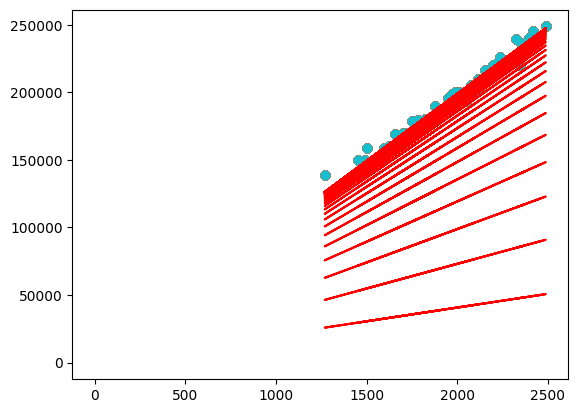

In [112]:
iteration = 100
learning_rate = 0.00000005
theta, cost_list = model(X, Y, learning_rate = learning_rate,
iteration = iteration)